In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
# Number of trials
N = 1000

In [3]:
# Generate random values for x_I
x_I = np.zeros(N)

for i in range (len(x_I)):
    val = randint(-1, 1)
    if(val < 0):
        x_I[i] = -1
    else:
        x_I[i] = 1

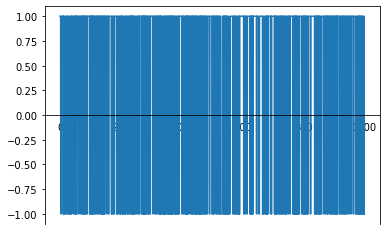

In [4]:
N_samples_sec = 400 #Sample Frequency
t_sample = 1/N_samples_sec # 
t = np.arange(0, len(x_I), t_sample) # Time array
L_t = len(t) # Length of time array

Ts = 1

shaped_pulse = np.repeat(x_I,N_samples_sec*Ts)


p = np.zeros(L_t)
p[:N_samples_sec] = 1

p_reversed = np.copy(p)
p_reversed = p_reversed[::-1]

plt.plot(t,shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

Sent from transmitter:


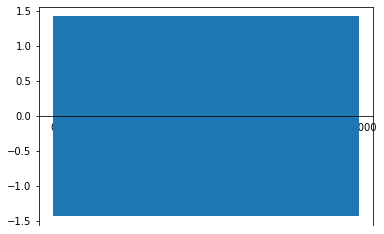

Received at receiver (noise added):


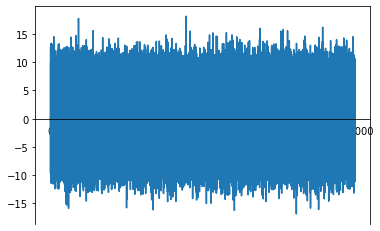

Input to match filter:


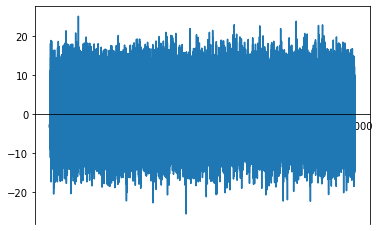

Output of match filter:


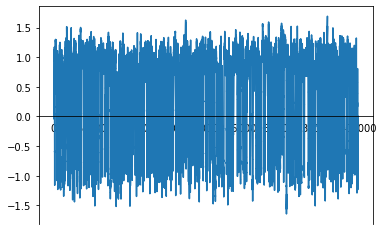


Error Rate
0.0


In [5]:
def slicer(num):
    if (num < 0):
        return -1
    else:
        return 1

f_c = 100


# Modulate at transmitter
i = 0

for val in shaped_pulse:
    shaped_pulse[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    i = i+1

print("Sent from transmitter:")
plt.plot(shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

# Add noise to channel
Ep = 1
EpNo_dB = 12
EpNo = 10 ** (EpNo_dB / 10)
No = 1 / EpNo # since Ep=1 is used

sigma = np.sqrt(No * N_samples_sec / 2)

noise = np.random.normal(0, sigma, L_t)
shaped_pulse = shaped_pulse + noise


print("Received at receiver (noise added):")
plt.plot(shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Modulate at receiver
i = 0

for val in shaped_pulse:
    shaped_pulse[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    i = i+1

print("Input to match filter:")
plt.plot(shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Match Filter
MF_output = np.convolve(shaped_pulse,p_reversed) / N_samples_sec
MF_output = np.trim_zeros(MF_output)


print("Output of match filter:")
plt.plot(MF_output)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

print("")
print("Error Rate")

errors = 0

for i in range(len(x_I)):
    num = MF_output[(i+1)*N_samples_sec - 1]
    x_I_hat = slicer(num)
    
    if(x_I_hat != x_I[i]):
        errors += 1
        
print(errors/len(x_I))